In [1]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0

import numpy as np
import pandas as pd
import sys
sys.path.append('/zfsauton2/home/mgoswami/PyMAD/') # TODO: Make this relative path maybe
sys.path.append('/zfsauton2/home/mgoswami/tsad-model-selection/src')

from model_selection.model_selection import RankModels
from model_trainer.entities import ANOMALY_ARCHIVE_ENTITIES, ANOMALY_ARCHIVE_ENTITY_TO_DATA_FAMILY
from model_selection.utils import visualize_predictions, visualize_data
from model_selection.rank_aggregation import trimmed_borda, trimmed_kemeny, trimmed_partial_borda, borda, kemeny, partial_borda, influence, averagedistance
from metrics.metrics import evaluate_model_selection

In [2]:
### Let's declare the parameters for our Ranking Model

dataset = 'anomaly_archive'
entity = '028_UCR_Anomaly_DISTORTEDInternalBleeding17'
rank_model_params = {
    'dataset': dataset, # anomaly_archive
    'entity': entity, #'001_UCR_Anomaly_DISTORTED1sddb40', 
    'trained_model_path': r'/home/scratch/mgoswami/trained_models/', 
    'downsampling': 10, 
    'min_length': 256, 
    'root_dir': r'/home/scratch/mgoswami/datasets/',
    'normalize': True, 
    'verbose': False 
}

# Create a ranking object
rankingObj = RankModels(**rank_model_params)

Path to trained models: /home/scratch/mgoswami/trained_models/anomaly_archive/028_UCR_Anomaly_DISTORTEDInternalBleeding17
Models in the model set: ['DGHL_1', 'DGHL_2', 'DGHL_3', 'DGHL_4', 'RNN_1', 'RNN_2', 'RNN_3', 'RNN_4', 'LSTMVAE_1', 'LSTMVAE_2', 'LSTMVAE_3', 'LSTMVAE_4', 'NN_1', 'NN_2', 'NN_3', 'MD_1', 'RM_1', 'RM_2', 'RM_3']
Total number of models in the model set: 19


### Visualize the datasets

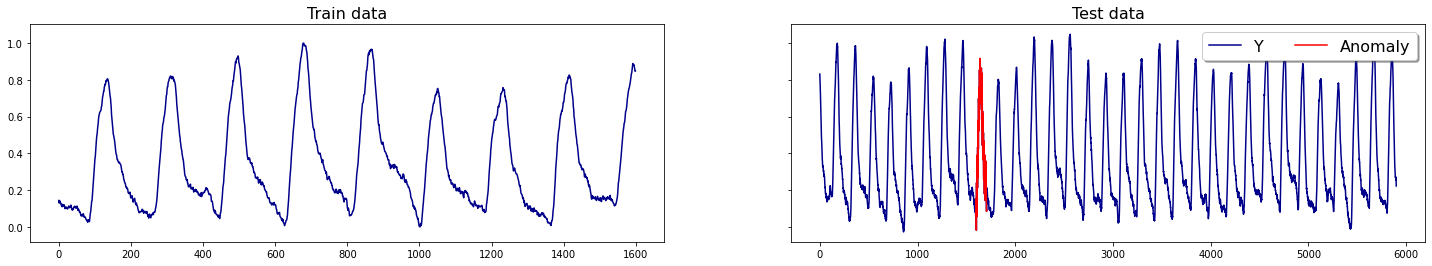

In [3]:
visualize_data(train_data=rankingObj.train_data, test_data=rankingObj.test_data)

### Evaluate Models in the Model Set

In [3]:
models_performance_matrix = rankingObj.evaluate_models(n_repeats=1, n_neighbors=[4], split='test', synthetic_ranking_criterion='f1', n_splits=100)

100%|██████████| 19/19 [00:41<00:00,  2.17s/it]


### Load Pre-Evaluated Ranking Object

In [4]:
import pickle as pkl
import os 

SAVE_DIR = '/home/ubuntu/efs/results'
ranking_obj_file = f'ranking_obj_{entity}.data'
    
with open(os.path.join(SAVE_DIR, dataset, ranking_obj_file), 'rb') as f: 
    rankingObj = pkl.load(f)

### Visualize the trained models

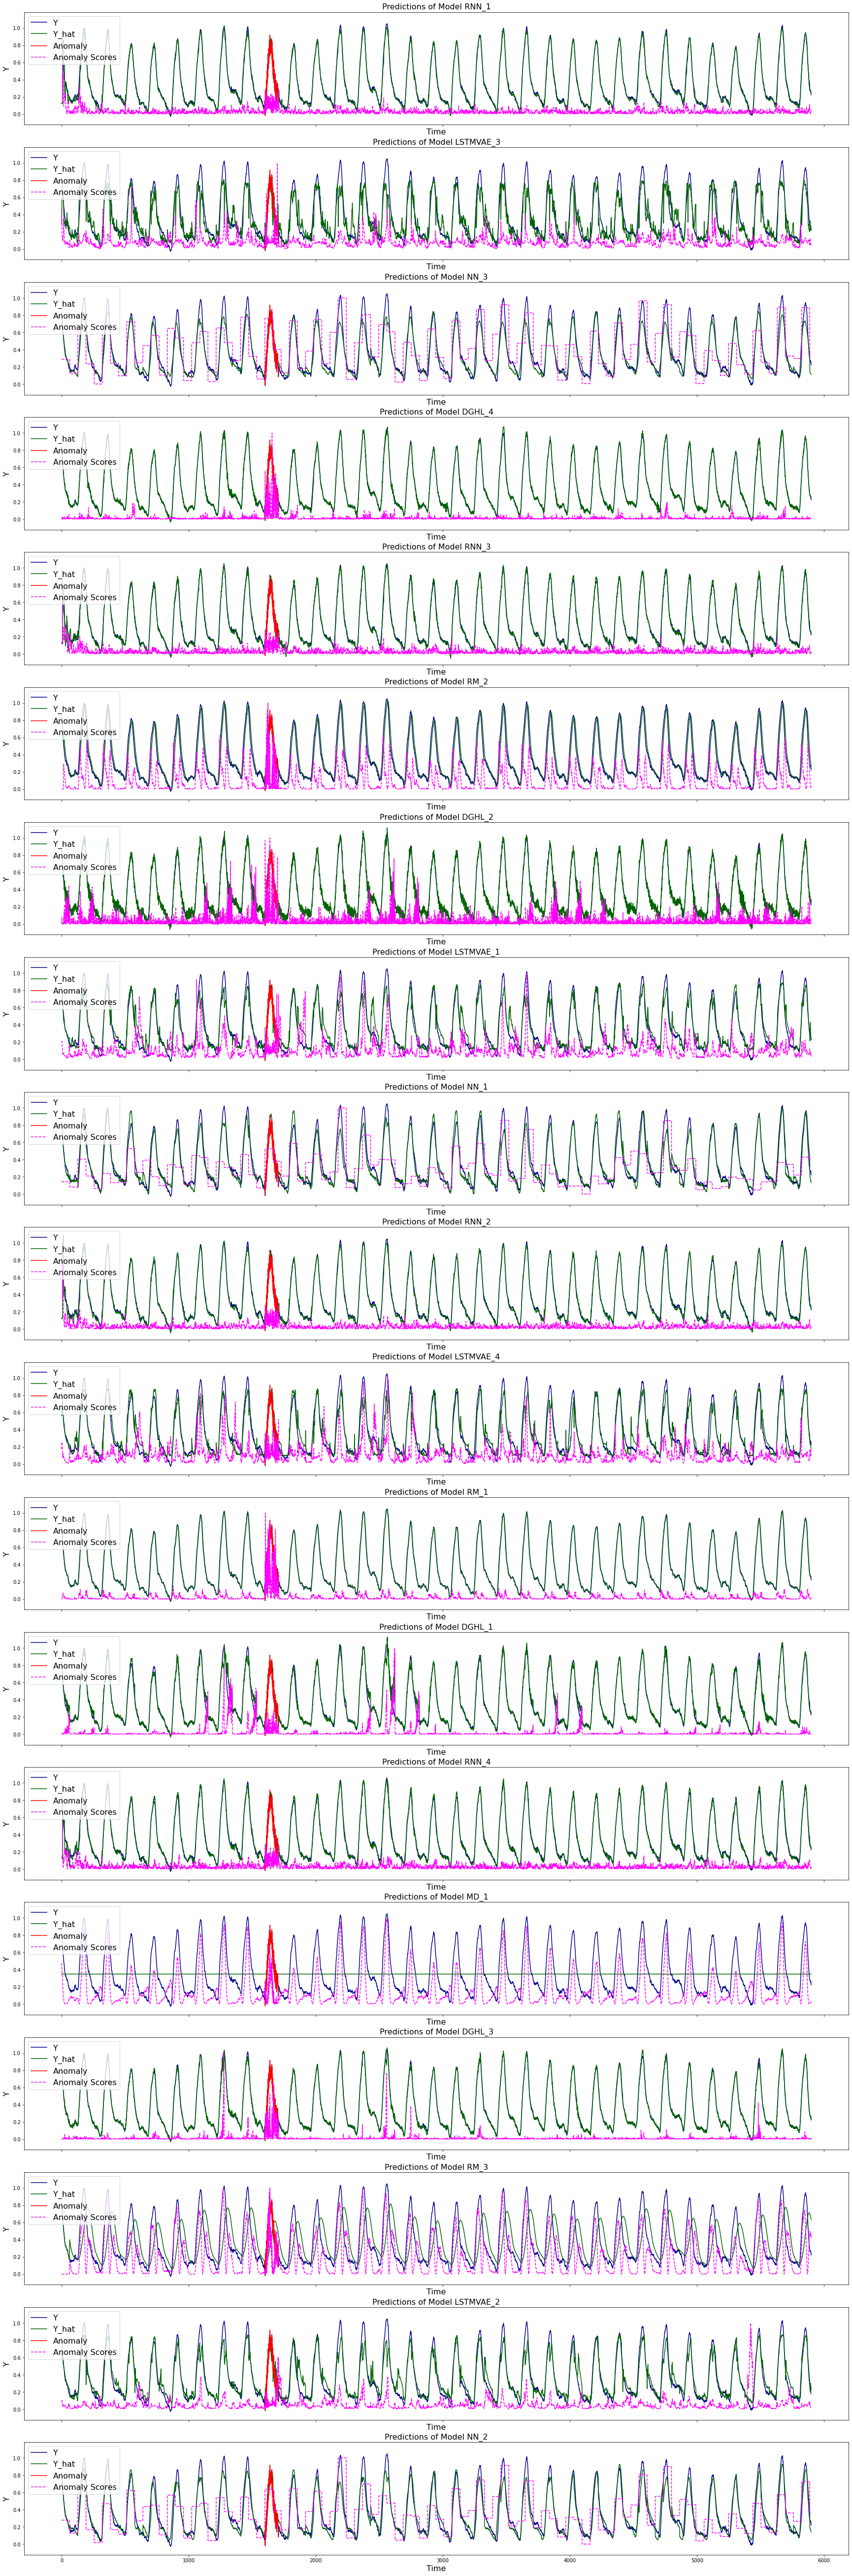

In [5]:
visualize_predictions(rankingObj.predictions, savefig=True)

### Compute the Ranking of Models

In [6]:
rankingObj.models_performance_matrix

PR-AUC  Best F-1       MAE       MSE     SMAPE      MAPE  \
RNN_1      0.093750  0.315787  0.182470  0.053654  0.350850  0.319995   
LSTMVAE_3  0.187500  0.545450  0.159468  0.039838  0.287095  0.279239   
NN_3       0.008451  0.033241  0.159385  0.038370  0.287827  0.285992   
DGHL_4     0.030000  0.113206  0.084237  0.011234  0.154586  0.163435   
RNN_3      0.090909  0.307690  0.168102  0.043329  0.307099  0.305293   
RM_2       0.000000  0.999993  0.127512  0.024498  0.231137  0.253630   
DGHL_2     0.026786  0.101694  0.108403  0.017612  0.197283  0.217485   
LSTMVAE_1  0.176470  0.521735  0.155804  0.038327  0.279687  0.273226   
NN_1       0.007160  0.028235  0.199026  0.065696  0.405116  0.366897   
RNN_2      0.428570  0.923071  0.190905  0.058030  0.348507  0.340198   
LSTMVAE_4  0.136363  0.428568  0.157578  0.039085  0.283612  0.277179   
RM_1       0.249999  0.666661  0.087372  0.012352  0.160699  0.172058   
DGHL_1     0.047619  0.173911  0.106078  0.017160  0.194436  0.215794   
RNN_4      0.142857  0.444441  0.180759  0.049642  0.329700  0.330450   
MD_1       0.299999  0.749994  0.149999  0.034862  0.267888  0.269973   
DGHL_3     0.040000  0.148147  0.094852  0.013924  0.174319  0.192092   
RM_3       0.200000  0.571424  0.123332  0.026273  0.217726  0.243258   
LSTMVAE_2  0.166666  0.499996  0.157461  0.038861  0.282785  0.278395   
NN_2       0.008451  0.033241  0.159489  0.039505  0.293429  0.285937   

           LIKELIHOOD  CENTRALITY_4  CENTRALITY_10  CENTRALITY_16  ...  \
RNN_1        0.269371      21714.75        28145.4     32275.6250  ...   
LSTMVAE_3    0.257154       5006.00        18513.8     24756.0000  ...   
NN_3         0.268701       9730.75        22830.8     27329.1875  ...   
DGHL_4       0.280528      17253.75        26807.6     30727.4375  ...   
RNN_3        0.278760      21919.50        28127.4     31919.6250  ...   
RM_2         0.275338      21780.25        27893.6     31573.6250  ...   
DGHL_2       0.277275      15441.00        25871.0     30083.8125  ...   
LSTMVAE_1    0.269003       5170.50        17986.4     24310.5000  ...   
NN_1         0.282805      11739.75        24383.2     28587.5625  ...   
RNN_2        0.278318      22289.25        28173.6     31881.6250  ...   
LSTMVAE_4    0.264150       4031.50        18180.6     24563.6250  ...   
RM_1         0.284132      22761.25        30734.1     34510.6250  ...   
DGHL_1       0.279310      15248.00        25791.2     30103.3125  ...   
RNN_4        0.273078      20994.50        26975.0     31039.0000  ...   
MD_1         0.271518      10569.25        20560.6     25264.4375  ...   
DGHL_3       0.279463      14746.50        25823.8     30475.3125  ...   
RM_3         0.282200      20140.25        27274.9     30636.8125  ...   
LSTMVAE_2    0.267441       4060.00        18123.4     24474.7500  ...   
NN_2         0.272132       9730.75        22830.8     27329.1875  ...   

           SYNTHETIC_F1_spikes_type_spikes_rep_0_0  \
RNN_1                                     0.811589   
LSTMVAE_3                                 0.777773   
NN_3                                      0.175547   
DGHL_4                                    0.767118   
RNN_3                                     0.682922   
RM_2                                      0.965512   
DGHL_2                                    0.874995   
LSTMVAE_1                                 0.746662   
NN_1                                      0.219606   
RNN_2                                     0.608691   
LSTMVAE_4                                 0.903221   
RM_1                                      0.949147   
DGHL_1                                    0.823524   
RNN_4                                     0.708856   
MD_1                                      0.651158   
DGHL_3                                    0.835816   
RM_3                                      0.746662   
LSTMVAE_2                                 0.888884   
NN_2                                      0.1

In [7]:
from evaluation.evaluation import pool_random_repetitions
from metrics.ranking_metrics import rank_by_praucs, rank_by_centrality, rank_by_synthetic_anomlies, rank_by_forecasting_metrics, rank_by_max_F1, rank_by_prauc_f1
from model_selection.model_selection_utils import rank_models

synthetic_predictions = pool_random_repetitions(rankingObj.synthetic_predictions)
n_splits = 100

# Now use to predictions to rank the model
models_prauc_f1 = rank_by_prauc_f1(rankingObj.predictions, n_splits=n_splits)
models_forecasting_metrics = rank_by_forecasting_metrics(rankingObj.predictions)
models_centrality = rank_by_centrality(rankingObj.predictions, n_neighbors=[6])
models_synthetic_anomlies = rank_by_synthetic_anomlies(synthetic_predictions, criterion='f1', n_splits=n_splits)

models_performance_matrix = pd.concat([
    models_prauc_f1,
    models_forecasting_metrics, 
    models_centrality, 
    models_synthetic_anomlies], axis=1)

In [8]:
MODEL_NAMES = ['RNN_1', 'RNN_2', 'RNN_3', 'RNN_4', 'LSTMVAE_1', 'LSTMVAE_2', 'LSTMVAE_3', 'LSTMVAE_4', 'NN_1', 'NN_2', 'NN_3', 'DGHL_1', 'DGHL_2', 'DGHL_3', 'DGHL_4', 'MD_1', 'RM_1', 'RM_2', 'RM_3']
synthetic_predictions = pool_random_repetitions(synthetic_predictions)
quantities = list(synthetic_predictions[MODEL_NAMES[0]].keys())
print(quantities)

['anomalysizes_type_spikes', 'anomalylabels_type_spikes', 'entityscores_type_spikes', 'Ta_type_spikes', 'anomalysizes_type_contextual', 'anomalylabels_type_contextual', 'entityscores_type_contextual', 'Ta_type_contextual', 'anomalysizes_type_flip', 'anomalylabels_type_flip', 'entityscores_type_flip', 'Ta_type_flip', 'anomalysizes_type_speedup', 'anomalylabels_type_speedup', 'entityscores_type_speedup', 'Ta_type_speedup', 'anomalysizes_type_noise', 'anomalylabels_type_noise', 'entityscores_type_noise', 'Ta_type_noise', 'anomalysizes_type_cutoff', 'anomalylabels_type_cutoff', 'entityscores_type_cutoff', 'Ta_type_cutoff', 'anomalysizes_type_scale', 'anomalylabels_type_scale', 'entityscores_type_scale', 'Ta_type_scale', 'anomalysizes_type_wander', 'anomalylabels_type_wander', 'entityscores_type_wander', 'Ta_type_wander', 'anomalysizes_type_average', 'anomalylabels_type_average', 'entityscores_type_average', 'Ta_type_average']


In [12]:
models_performance_matrix

PR-AUC  Best F-1       MAE       MSE     SMAPE      MAPE  \
RNN_1      0.093750  0.315787  0.182470  0.053654  0.350850  0.319995   
LSTMVAE_3  0.187500  0.545450  0.159468  0.039838  0.287095  0.279239   
NN_3       0.008451  0.033241  0.159385  0.038370  0.287827  0.285992   
DGHL_4     0.030000  0.113206  0.084237  0.011234  0.154586  0.163435   
RNN_3      0.090909  0.307690  0.168102  0.043329  0.307099  0.305293   
RM_2       0.000000  0.999993  0.127512  0.024498  0.231137  0.253630   
DGHL_2     0.026786  0.101694  0.108403  0.017612  0.197283  0.217485   
LSTMVAE_1  0.176470  0.521735  0.155804  0.038327  0.279687  0.273226   
NN_1       0.007160  0.028235  0.199026  0.065696  0.405116  0.366897   
RNN_2      0.428570  0.923071  0.190905  0.058030  0.348507  0.340198   
LSTMVAE_4  0.136363  0.428568  0.157578  0.039085  0.283612  0.277179   
RM_1       0.249999  0.666661  0.087372  0.012352  0.160699  0.172058   
DGHL_1     0.047619  0.173911  0.106078  0.017160  0.194436  0.215794   
RNN_4      0.142857  0.444441  0.180759  0.049642  0.329700  0.330450   
MD_1       0.299999  0.749994  0.149999  0.034862  0.267888  0.269973   
DGHL_3     0.040000  0.148147  0.094852  0.013924  0.174319  0.192092   
RM_3       0.200000  0.571424  0.123332  0.026273  0.217726  0.243258   
LSTMVAE_2  0.166666  0.499996  0.157461  0.038861  0.282785  0.278395   
NN_2       0.008451  0.033241  0.159489  0.039505  0.293429  0.285937   

           LIKELIHOOD  CENTRALITY_6  SYNTHETIC_F1_contextual  \
RNN_1        0.269371  24510.500000                 0.666662   
LSTMVAE_3    0.257154  10715.833333                 0.666662   
NN_3         0.268701  16763.833333                 0.279299   
DGHL_4       0.280528  21935.166667                 0.982451   
RNN_3        0.278760  25012.833333                 0.741717   
RM_2         0.275338  24879.666667                 0.965512   
DGHL_2       0.277275  20675.500000                 0.957260   
LSTMVAE_1    0.269003  10046.500000                 0.732021   
NN_1         0.282805  18493.833333                 0.410253   
RNN_2        0.278318  25160.833333                 0.941171   
LSTMVAE_4    0.264150  10000.500000                 0.713371   
RM_1         0.284132  25796.500000                 0.965512   
DGHL_1       0.279310  20108.833333                 0.949147   
RNN_4        0.273078  23452.500000                 0.695648   
MD_1         0.271518  14170.166667                 0.783212   
DGHL_3       0.279463  19808.500000                 0.973908   
RM_3         0.282200  23103.500000                 0.957260   
LSTMVAE_2    0.267441   9860.500000                 0.717944   
NN_2         0.272132  16763.833333                 0.294733   

           SYNTHETIC_PR-AUC_contextual  ...  SYNTHETIC_F1_average  \
RNN_1                         0.381410  ...              0.629209   
LSTMVAE_3                     0.213637  ...              0.662717   
NN_3                          0.102651  ...              0.279299   
DGHL_4                        0.474712  ...              0.945143   
RNN_3                         0.453429  ...              0.741717   
RM_2                          0.452083  ...              0.636359   
DGHL_2                        0.441629  ...              0.914281   
LSTMVAE_1                     0.496820  ...              0.658819   
NN_1                          0.168994  ...              0.279299   
RNN_2                         0.633987  ...              0.775082   
LSTMVAE_4                     0.464420  ...              0.678783   
RM_1                          0.452083  ...              0.903221   
DGHL_1                        0.663734  ...              0.774188   
RNN_4                         0.397398  ...              0.730430   
MD_1                          0.279564  ...              0.658819   
DGHL_3                        0.688901  ...              0.851706   
RM_3                          0.455314  ...              0.618780   
LSTMVAE_2                    

In [10]:
models_performance_matrix.columns

Index(['PR-AUC', 'Best F-1', 'MAE', 'MSE', 'SMAPE', 'MAPE', 'LIKELIHOOD',
       'CENTRALITY_6', 'SYNTHETIC_F1_contextual',
       'SYNTHETIC_PR-AUC_contextual', 'SYNTHETIC_F1_spikes',
       'SYNTHETIC_PR-AUC_spikes', 'SYNTHETIC_F1_scale',
       'SYNTHETIC_PR-AUC_scale', 'SYNTHETIC_F1_wander',
       'SYNTHETIC_PR-AUC_wander', 'SYNTHETIC_F1_average',
       'SYNTHETIC_PR-AUC_average', 'SYNTHETIC_F1_noise',
       'SYNTHETIC_PR-AUC_noise', 'SYNTHETIC_F1_speedup',
       'SYNTHETIC_PR-AUC_speedup', 'SYNTHETIC_F1_flip',
       'SYNTHETIC_PR-AUC_flip', 'SYNTHETIC_F1_cutoff',
       'SYNTHETIC_PR-AUC_cutoff'],
      dtype='object')

In [20]:
ranks_by_metrics, rank_prauc, rank_f1 = rank_models(models_performance_matrix)
ranks = np.concatenate([ranks_by_metrics[:6, :], ranks_by_metrics[6::2, :]], axis=0).astype(int) # NOTE: 6 instead of 8 because of only one centrality metric

In [21]:
# rank_f1
f1 = models_performance_matrix.iloc[:, 1].to_numpy()
f1[rank_f1.astype(int)]

array([0.99999333, 0.92307053, 0.74999438, 0.66666148, 0.57142395,
       0.54545008, 0.52173482, 0.49999583, 0.44444066, 0.42856776,
       0.31578665, 0.30768955, 0.17391141, 0.14814674, 0.11320646,
       0.10169393, 0.03324067, 0.03324067, 0.02823501])

In [22]:
f1[borda(ranks)[1].astype(int)]

array([0.54545008, 0.74999438, 0.49999583, 0.92307053, 0.02823501,
       0.44444066, 0.10169393, 0.52173482, 0.42856776, 0.17391141,
       0.14814674, 0.99999333, 0.66666148, 0.30768955, 0.03324067,
       0.57142395, 0.11320646, 0.31578665, 0.03324067])

In [23]:
f1[trimmed_borda(ranks, aggregation_type='borda', metric='influence')[1].astype(int)]

array([0.10169393, 0.57142395, 0.99999333, 0.14814674, 0.17391141,
       0.11320646, 0.66666148, 0.92307053, 0.54545008, 0.49999583,
       0.52173482, 0.42856776, 0.31578665, 0.30768955, 0.44444066,
       0.74999438, 0.03324067, 0.02823501, 0.03324067])

In [24]:
f1[partial_borda(ranks, top_k=5)[1].astype(int)]

array([0.10169393, 0.03324067, 0.57142395, 0.52173482, 0.14814674,
       0.17391141, 0.42856776, 0.74999438, 0.49999583, 0.44444066,
       0.66666148, 0.54545008, 0.03324067, 0.31578665, 0.30768955,
       0.02823501, 0.99999333, 0.11320646, 0.92307053])

In [29]:
f1[trimmed_partial_borda(ranks, top_k=5, metric='influence', aggregation_type='borda')[1].astype(int)]

array([0.03324067, 0.03324067, 0.03324067, 0.03324067, 0.03324067,
       0.11320646, 0.03324067, 0.03324067, 0.54545008, 0.03324067,
       0.03324067, 0.03324067, 0.31578665, 0.30768955, 0.03324067,
       0.03324067, 0.03324067, 0.03324067, 0.03324067])

In [26]:
top_k=5
reliability = influence(ranks, aggregation_type='borda', top_k=top_k)
# trimmed_ranks = ranks[reliability > 0, :]
trimmed_ranks = ranks[np.argsort(-1*reliability)[:1], :]
f1[borda(trimmed_ranks)[1].astype(int)]
# reliability = averagedistance(ranks, top_k=5)

array([0.10169393, 0.57142395, 0.99999333, 0.14814674, 0.17391141,
       0.11320646, 0.66666148, 0.92307053, 0.54545008, 0.49999583,
       0.52173482, 0.42856776, 0.31578665, 0.30768955, 0.44444066,
       0.74999438, 0.03324067, 0.02823501, 0.03324067])

In [27]:
for i, r in enumerate(ranks): 
    print(i, f1[r][:5], r[:5], reliability[i])

0 [0.11320646 0.66666148 0.14814674 0.17391141 0.10169393] [ 3 11 15 12  6] 1.2727256528946136
1 [0.11320646 0.66666148 0.14814674 0.17391141 0.10169393] [ 3 11 15 12  6] -14.000196002744437
2 [0.11320646 0.66666148 0.14814674 0.17391141 0.10169393] [ 3 11 15 12  6] 4.666644888990651
3 [0.11320646 0.66666148 0.14814674 0.17391141 0.10169393] [ 3 11 15 12  6] -2.80000784002192
4 [0.66666148 0.02823501 0.57142395 0.11320646 0.14814674] [11  8 16  3 15] 0.5599996864001737
5 [0.49999583 0.42856776 0.52173482 0.54545008 0.74999438] [17 10  7  1 14] 2.79999216002192
6 [0.11320646 0.14814674 0.99999333 0.66666148 0.57142395] [ 3 15  5 11 16] 0.31111101432101834
7 [0.74999438 0.66666148 0.31578665 0.11320646 0.14814674] [14 11  0  3 15] 0.33333322222225925
8 [0.44444066 0.92307053 0.99999333 0.66666148 0.30768955] [13  9  5 11  4] 6.999951000343197
9 [0.11320646 0.10169393 0.66666148 0.14814674 0.92307053] [ 3  6 11 15  9] -0.6363640413225725
10 [0.66666148 0.99999333 0.92307053 0.10169393 0.7

In [332]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(reliability.reshape((-1, 1)))

cluster_ids, counts = np.unique(clustering, return_counts=True)
largest_cluster_idx = cluster_ids[np.argmax(counts)] # Largest cluster
print(f'Clustering: ', clustering)

most_reliable_cluster_idx = np.argmax([
    np.sum(reliability[np.where(clustering == 0)[0]]), 
    np.sum(reliability[np.where(clustering == 1)[0]])]) 
    # np.sum(reliability[np.where(clustering == 2)[0]])])
print('Most reliable cluster idx:', most_reliable_cluster_idx, f'Largest: {largest_cluster_idx}')

# trimmed_ranks = ranks[np.where(clustering == largest_cluster_idx)[0], :]
# trimmed_ranks = ranks[np.where(clustering == most_reliable_cluster_idx)[0], :]
trimmed_ranks = ranks[reliability > 0, :]

Clustering:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Most reliable cluster idx: 0 Largest: 0


In [145]:
trimmed_ranks.shape

(6, 19)

In [22]:
f1[trimmed_partial_borda(ranks, top_k=5, aggregation_type='partial_borda', metric='influence')[1].astype(int)]

array([0.16793737, 0.64705407, 0.87999437, 0.20560559, 0.05301153,
       0.87999437, 0.04592857, 0.75861546, 0.99999409, 0.59459009,
       0.31883781, 0.2178198 , 0.81480938, 0.33333045, 0.04592857,
       0.61110653, 0.78570895, 0.95651592, 0.37930714])

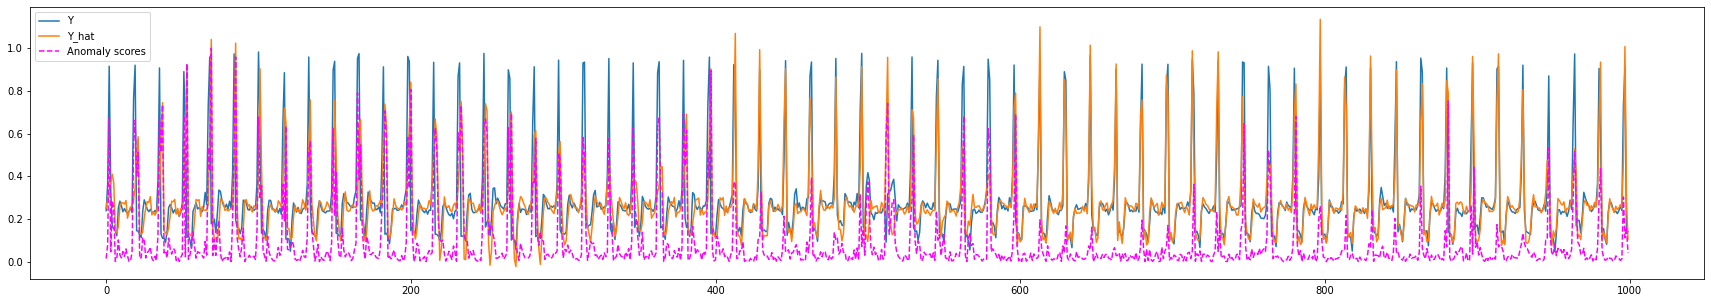

In [340]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(30, 5))

model_name = 'RNN_3'
start = np.argmax(rankingObj.predictions[model_name]['anomaly_labels'].flatten()) - 500
stop = np.argmax(rankingObj.predictions[model_name]['anomaly_labels'].flatten()) + 500

axes.plot(rankingObj.predictions[model_name]['Y'].flatten()[start:stop], label='Y')
axes.plot(rankingObj.predictions[model_name]['Y_hat'].flatten()[start:stop], label='Y_hat')

entity_scores = rankingObj.predictions[model_name]['entity_scores'].flatten()[start:stop]
entity_scores = (entity_scores - entity_scores.min())/(entity_scores.max() - entity_scores.min())
axes.plot(entity_scores, linestyle='--', c='magenta', label='Anomaly scores')
axes.legend()

In [337]:
rankingObj.models_performance_matrix.loc[:, 'Best F-1'].sort_values()

NN_3         0.033843
NN_2         0.057613
RM_1         0.058905
RM_2         0.061946
NN_1         0.121738
MD_1         0.130840
RM_3         0.138157
LSTMVAE_3    0.318179
RNN_2        0.335997
RNN_1        0.545450
RNN_3        0.575338
RNN_4        0.617643
LSTMVAE_2    0.646149
LSTMVAE_4    0.699995
DGHL_4       0.777773
DGHL_2       0.823524
DGHL_1       0.839995
DGHL_3       0.954540
LSTMVAE_1    0.999995
Name: Best F-1, dtype: float64

In [342]:
rankingObj.models_performance_matrix.loc[:, 'LIKELIHOOD'].sort_values()

LSTMVAE_2    0.262410
LSTMVAE_3    0.300855
LSTMVAE_4    0.303258
RM_1         0.310318
LSTMVAE_1    0.311437
NN_2         0.321635
DGHL_1       0.321731
DGHL_2       0.322317
NN_3         0.324020
DGHL_3       0.325102
DGHL_4       0.325305
RM_2         0.330283
RM_3         0.331505
MD_1         0.333642
RNN_4        0.338237
RNN_1        0.339469
RNN_2        0.341169
RNN_3        0.345557
NN_1         0.346032
Name: LIKELIHOOD, dtype: float64

In [347]:
anomaly_type = 'flip_rep_1_2'
rankingObj.models_performance_matrix.loc[:, f"SYNTHETIC_F1_{anomaly_type.split('_')[0]}_type_{anomaly_type}"].sort_values()

DGHL_3       0.204378
DGHL_1       0.209474
DGHL_2       0.272725
DGHL_4       0.302156
NN_2         0.323074
NN_3         0.323074
RM_3         0.334659
MD_1         0.341461
RM_2         0.366809
NN_1         0.428568
RNN_2        0.785042
RNN_4        0.865974
RNN_3        0.874995
RNN_1        0.884205
RM_1         0.976739
LSTMVAE_2    0.999995
LSTMVAE_1    0.999995
LSTMVAE_3    0.999995
LSTMVAE_4    0.999995
Name: SYNTHETIC_F1_flip_type_flip_rep_1_2, dtype: float64

In [350]:
anomaly_type = 'flip'
set([ '_'.join(i.split('_')[2:]) for i in rankingObj.synthetic_predictions['RNN_4'].keys() if anomaly_type in i])

['flip_rep_0_2',
 'flip_rep_0_2',
 'flip_rep_0_2',
 'flip_rep_0_2',
 'flip_rep_1_2',
 'flip_rep_1_2',
 'flip_rep_1_2',
 'flip_rep_1_2']

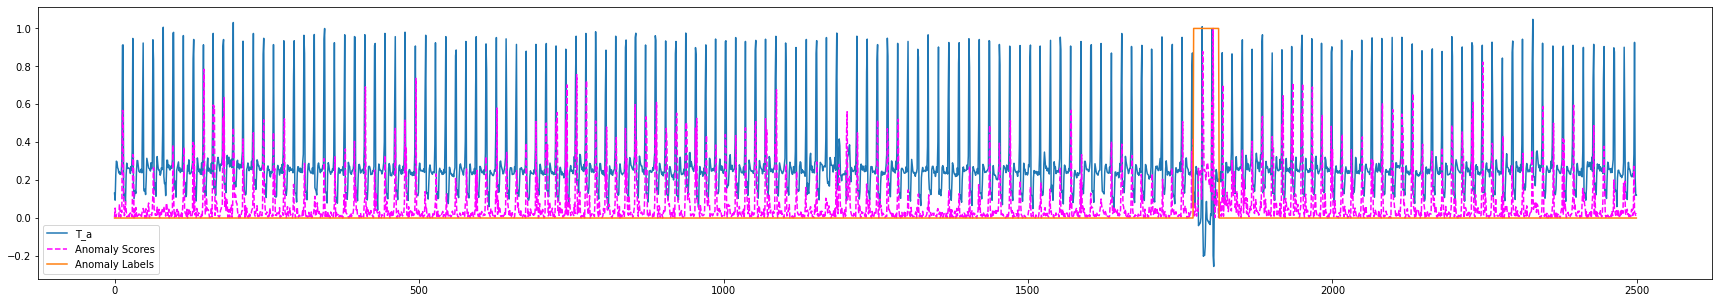

In [346]:
fig, axes = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(30, 5))

axes.plot(rankingObj.synthetic_predictions[model_name][f'Ta_type_{anomaly_type}'].flatten(), label='T_a')
entity_scores = rankingObj.synthetic_predictions[model_name][f'entityscores_type_{anomaly_type}'].flatten()
entity_scores = (entity_scores - entity_scores.min())/(entity_scores.max() - entity_scores.min())
axes.plot(entity_scores, label='Anomaly Scores', linestyle='--', c='magenta')
axes.plot(rankingObj.synthetic_predictions[model_name][f'anomalylabels_type_{anomaly_type}'].flatten(), label='Anomaly Labels')
axes.legend()

In [317]:
rankingObj.synthetic_predictions['RNN_4'].keys()

dict_keys(['anomalysizes_type_spikes_rep_0_0', 'anomalylabels_type_spikes_rep_0_0', 'entityscores_type_spikes_rep_0_0', 'Ta_type_spikes_rep_0_0', 'anomalysizes_type_contextual_rep_0_1', 'anomalylabels_type_contextual_rep_0_1', 'entityscores_type_contextual_rep_0_1', 'Ta_type_contextual_rep_0_1', 'anomalysizes_type_flip_rep_0_2', 'anomalylabels_type_flip_rep_0_2', 'entityscores_type_flip_rep_0_2', 'Ta_type_flip_rep_0_2', 'anomalysizes_type_speedup_rep_0_3', 'anomalylabels_type_speedup_rep_0_3', 'entityscores_type_speedup_rep_0_3', 'Ta_type_speedup_rep_0_3', 'anomalysizes_type_speedup_rep_0_4', 'anomalylabels_type_speedup_rep_0_4', 'entityscores_type_speedup_rep_0_4', 'Ta_type_speedup_rep_0_4', 'anomalysizes_type_speedup_rep_0_5', 'anomalylabels_type_speedup_rep_0_5', 'entityscores_type_speedup_rep_0_5', 'Ta_type_speedup_rep_0_5', 'anomalysizes_type_speedup_rep_0_6', 'anomalylabels_type_speedup_rep_0_6', 'entityscores_type_speedup_rep_0_6', 'Ta_type_speedup_rep_0_6', 'anomalysizes_type_n

In [343]:
ranks = trimmed_kemeny(rankingObj.ranks[:5, :], verbose=False, metric='influence', aggregation_type='kemeny')[1]
# ranks = trimmed_borda(rankingObj.ranks[:5, :], metric='influence', aggregation_type='borda')[1]
ranks = ranks.astype(int)
ranks

array([15, 12,  6,  3, 10, 17, 13,  4,  0,  9,  1, 16, 14,  8,  5, 11, 18,
        2,  7])

In [344]:
rankingObj.models_performance_matrix.iloc[:, 1].to_numpy()[ranks]

array([0.95454003, 0.83999479, 0.82352424, 0.77777274, 0.69999522,
       0.64614927, 0.61764261, 0.57533821, 0.54545044, 0.33599715,
       0.31817909, 0.1381566 , 0.13083989, 0.12173798, 0.0619463 ,
       0.05890546, 0.05761261, 0.03384334, 0.99999452])

In [94]:
anomaly_type = 'wander'
rankingObj.models_performance_matrix.loc[:, [i for i in rankingObj.models_performance_matrix.columns if ((anomaly_type in i) and ('F1' in i))]].sort_values(by='SYNTHETIC_F1_wander_type_wander_rep_1_14')

SYNTHETIC_F1_wander_type_wander_rep_1_16  \
NN_1                                       0.316015   
NN_3                                       0.437122   
NN_2                                       0.316015   
RNN_4                                      0.959995   
RM_3                                       0.883431   
RNN_1                                      0.929027   
DGHL_3                                     0.578309   
RNN_2                                      0.959995   
DGHL_1                                     0.575996   
DGHL_2                                     0.727268   
DGHL_4                                     0.628817   
RM_2                                       0.947363   
LSTMVAE_1                                  0.666662   
RNN_3                                      0.959995   
RM_1                                       0.959995   
MD_1                                       0.847054   

           SYNTHETIC_F1_wander_type_wander_rep_1_14  \
NN_1                                       0.223600   
NN_3                                       0.282396   
NN_2                                       0.282396   
RNN_4                                      0.519852   
RM_3                                       0.645735   
RNN_1                                      0.679241   
DGHL_3                                     0.685710   
RNN_2                                      0.688991   
DGHL_1                                     0.695648   
DGHL_2                                     0.699024   
DGHL_4                                     0.778374   
RM_2                                       0.799995   
LSTMVAE_1                                  0.832365   
RNN_3                                      0.935060   
RM_1                                       0.935060   
MD_1                                       0.979587   

           SYNTHETIC_F1_wander_type_wander_rep_0_15  \
NN_1                                       0.951802   
NN_3                                       0.810252   
NN_2                                       0.810252   
RNN_4                                      0.872923   
RM_3                                       0.987495   
RNN_1                                      0.844915   
DGHL_3                                     0.877773   
RNN_2                                      0.877773   
DGHL_1                                     0.844915   
DGHL_2                                     0.946103   
DGHL_4                                     0.868127   
RM_2                                       0.993706   
LSTMVAE_1                                  0.969320   
RNN_3                                      0.882677   
RM_1                                       0.902852   
MD_1                                       0.987495   

           SYNTHETIC_F1_wander_type_wander_rep_1_15  \
NN_1                                       0.366831   
NN_3                                       0.437122   
NN_2                                       0.366831   
RNN_4                                      0.923072   
RM_3                                       0.716413   
RNN_1                                      0.947363   
DGHL_3                                     0.642853   
RNN_2                                      0.947363   
DGHL_1                                     0.587751   
DGHL_2                                     0.705878   
DGHL_4                                     0.607591   
RM_2                                       0.905655   
LSTMVAE_1                                  0.818177   
RNN_3                                      0.947363   
RM_1                                       0.953637   
MD_1                                       0.993098   

           SYNTHETIC_F1_wander_type_wander_rep_1_17  \
NN_1                                       0.248274   
NN_3                                       0.279067   
NN_2                                       0.251289   
RNN_4                                      0.79

In [107]:
ranks_by_metrics, rank_prauc, rank_f1 = rankingObj.rank_models()
# Ranking data based on metrics
n_metrics, n_models = ranks_by_metrics.shape
print(f'Number of metrics: {n_metrics} | Number of models: {n_models}')

Number of metrics: 88 | Number of models: 16


In [42]:
from sklearn.cluster import AgglomerativeClustering
from model_selection.rank_aggregation import borda, influence, proximity, pagerank, kemeny, trimmed_borda, trimmed_kemeny
from sklearn.metrics import ndcg_score

influence_of_ranks = influence(ranks_by_metrics, aggregation_type='kemeny')
clustering = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(influence_of_ranks.reshape((-1, 1)))

cluster_ids, counts = np.unique(clustering, return_counts=True)
max_cluster = cluster_ids[np.argmax(counts)]

_, trimmed_kemeny_rank = kemeny(ranks_by_metrics[np.where(clustering == max_cluster)[0], :], verbose=False)
trimmed_kemeny_rank = trimmed_kemeny_rank.astype(int)

praucs = rankingObj.models_performance_matrix.iloc[:, 0].to_numpy().squeeze()
f1s = rankingObj.models_performance_matrix.iloc[:, 1].to_numpy().squeeze()
model_names = list(rankingObj.models_performance_matrix.index)

print('==== Statistics ====')
print(f'Rank by PR-AUC: {rank_prauc}')
print(f'Rank by F1: {rank_f1}')
print(f'Predicted rank: {trimmed_kemeny_rank}')
print(f'Max PR-AUC: {np.max(praucs)} is achieved by {model_names[np.argmax(praucs)]}')
print(f'Max F-1: {np.max(f1s)} is achieved by {model_names[np.argmax(f1s)]}')
print(f'Our chosen model is {model_names[trimmed_kemeny_rank[0]]} which has PR-AUC={praucs[trimmed_kemeny_rank[0]]} and best F-1={f1s[trimmed_kemeny_rank[0]]}')
print(f'NDCG of predicted ranks with PR-AUC={ndcg_score(praucs.reshape((1, -1)), trimmed_kemeny_rank.reshape((1, -1)))} and best F-1={ndcg_score(f1s.reshape((1, -1)), trimmed_kemeny_rank.reshape((1, -1)))}')

==== Statistics ====
Rank by PR-AUC: [11.  9. 10. 12.  0.  2.  8.  1. 15. 16. 18. 17. 14.  7.  6.  5.  3. 13.
  4.]
Rank by F1: [ 0.  2.  1.  4.  3. 13. 16. 15. 18. 17. 14.  5.  7.  6. 12.  8.  9. 10.
 11.]
Predicted rank: [ 0 11 10  1  9 15 17 16 18 14 13 12  5  2  4  3  6  7  8]
Max PR-AUC: 0.5009251926112943 is achieved by NN_3
Max F-1: 0.9999946154097633 is achieved by DGHL_1
Our chosen model is DGHL_1 which has PR-AUC=0.06123632140465723 and best F-1=0.9999946154097633
NDCG of predicted ranks with PR-AUC=0.6259430272411995 and best F-1=0.6962679079247844
